<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/python-logo.png" style="height: 100px;" align=right>

# Statistical Data Analysis 
Day 1.1

# Content Outline
1. [**Introduction**](#introduction)
    * [A. Course Scope and Layout](#scope)


2. [**Data Exploration: Examining Distributions**](#data_exploration)
    * [A. One Categorical Variable](#onecat): Frequency Distributions (counts, frequency table, and percentages), Bar Charts, Pie Charts
    * [B. One Numerical Variable](#one_numeric)
        * [Measures of Central Tendency](#central_tendency): 
            Median, Mean, Mode
        * [Measures of Dispersion/Variability](#dispersion): 
            Range, Quantiles (quartiles, percentiles, and Inter-quartile Range), Outliers, Variance and Standard Deviation, Histograms, Boxplots


3. [**Data Exploration: Examining Relationships**](#data_relationship)
    * [A. Categorical Explanatory and Response Variables](#ctoc): 
        Two-way Tables (Cross-tabulation), Conditional Percentage Tables, Multibar Charts
    * [B. Quantitative Explanatory and Categorical Response Variables](#ctoq): Numerical Summaries, Side-by-Side Boxplots
    * [C. Quantitative Explanatory and Quantitative Response Variables](#qtoq): Scatterplots, Linear Relationships and Pearson's Correlation Coefficient

In [1]:
import numpy as np 
import pandas as pd 
import math 

import seaborn as sns 
import matplotlib.pyplot as plt

from statistics import mode
from scipy.special import binom
from scipy.stats import iqr

In [2]:
sns.__version__ >= '0.9.0'
np.__version__ >= '1.15.4'
pd.__version__ >= '0.23.4'

True

In [3]:
sns.set()

# 1. Introduction <a name="introduction"></a>
Statistics is the science of **collecting**, **organizing**, **analyzing**, **interpreting**, and **presenting** data. It helps us convert measurements we gather from the world around us into knowledge in a **systematic** manner to ensure both **consistency** and **reproducibility** of results.

![](../images/statistics.png)

Our journey begins with the simplest of questions - *"What would we like to know about a certain group of objects?"* The objects here can refer to people, animals, buildings, household items, etc. - basically anything that is of interest to us. The grouping of said objects is referred to as a **population**, and our aim is to generalize any results we derive from our investigations to this entire group. Populations are usually defined to encompass the largest possible collection of objects that are of interest in a given study.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. A researcher wishes to study the happiness levels among students currently undergoing tertiary education. The population defined here would be the set of all university students in Malaysia.
<p>
2. The Kuala Lumpur City Council (DBKL) is interested in identifying the average household expenditure of families in the Bottom 40% (B40) category under its purview. The population defined here would be the set of all families with household income RM3,000 and below.
</div>

In most cases, the population is so large that collecting data from the entire group becomes **infeasible** (sometimes impossible). For example, suppose that we are interested in the average price of all the 2-bedroom apartments in KL - this population is so large that we cannot study all of it without expending significant effort. In situations such as these, we **collect** data only from a **subgroup** of the population, which we call a **sample**. Ideally, a sample should represent the population well. For instance, a sample of 2-bedroom apartment prices in KL should include apartments from various municipalities to ensure no one part of the city is **under/over-represented**. Further details on populations and samples will be discussed later in this course.

Having gathered some data on a problem of interest, our data can then be **organized** easily with the use of spreadsheets or databases. In this course, we will operate on the assumption that the data has been cleaned and organized on flat files (CSV, XLS, etc.) as we wish to *focus on the analysis* of our data and not the logistics behind how we store it.

The first step of **analyzing** data is to **explore** it - this involves examining the type of data we've collected, how it behaves, and summarize our findings. This process is called **exploratory data analysis (EDA)**, and is one of the most crucial steps to understanding our data.

Using said findings, we can employ probability and estimation to make generalizations about the population based on our sample. This process is called **inference**, and it represents the culmination of the analysis stage. Inference allows us to use the data collected via a sample to model the behavior of the entire population, e.g. using customer product reviews to determine what product features are in demand.

Last but not least, we **interpret** and **present** our data with appropriate visual aids. Interpretation often calls for domain-specific knowledge, which is subject to the context of our study. As always, it is best to let the data do the talking and that's precisely where **visualization** comes in.

The diagram below gives an overview of what is commonly known as **the big picture** of statistics. It represents the 3 core processes, which are producing/procuring data, exploratory analysis, and inference. Used well, statistics forms a powerful tool which can reap benefits for business decision making.

![](../images/BigPic.png)

### A. Course Scope and Layout <a name='scope'></a>
1. **Day 1**: We will explore the idea of using descriptive statistics to perform **exploratory data analysis**. Utilizing numerical measures and visual tools, we will examine sample data sets to extract valuable insight.
2. **Day 2**: We will discuss the various shapes that the **distribution** of our data can take and its implications on our analyses. We will also discuss the process of **sampling**, i.e. selecting samples from a population.

# 2. Data Exploration: Examining Distributions <a name='data_exploration'></a>
We will begin by describing some typical datasets a data practitioner (such as yourself) will encounter. 

Let us look at the *iris* open data set ([read more](https://archive.ics.uci.edu/ml/datasets/iris)). This data set contains information about the length of various features of irises and their corresponding species.

In [4]:
iris = pd.read_csv("../data/iris.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![](../images/Iris.png)

As you can see, the data is a table consisting of rows and columns. Each column represents a characteristic (or 'feature') of a flower, whereas each row corresponds to an individual flower (or 'observation').

Each column has restrictions on what values the fields can hold. The values of these fields can either be quantitative (as in `Sepal.Width`) or categorical (as in `Species`).

Categorical data can be either **nominal** or **ordinal**. There is no implicit ordering in the categories of nominal data. We can think of gender as a nominal value - it would not make sense to 'rank' women above men, or vice versa. In the *iris* dataset, the column `Species` has nominal values. For ordinal data, there is an implicit ordering defined for the categories. For instance, the size of a cup measured as "small", "medium", and "big" is ordinal.

Quantitative data on the other hand can be either **interval** or **ratio**. Interval data refers to data with an arbirtrary 0 such as time in A.D. and temperature in Celcius. On the contrary, ratio data refers to data with an absolute 0, such as physical measurements like length and weight.

In Python, the `pd.DataFrame.info()` method returns the type of each column (variable).

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.Species=iris.Species.astype('category')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [8]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.describe(include='category')

,Species
count,150
unique,3
top,virginica
freq,50


In [10]:
iris.describe(include=['float','category'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Let's explore this data. Each variable or column in the data is a long list, which is not very informative. To convert this raw data into meaningful information, we need to summarize and examine its **distribution**. The distribution of a variable shows *what values the variable takes* and *how often the variable takes those values*.

## A. One Categorical Variable <a name="onecat"></a>
For data that consists of one categorical variable, we are often interested in demographic information. For example, we may ask:
1. *How many different species of irises do we have in this sample?*
2. *What is the percentage breakdown of species in the sampled flowers?*

The unique categories of species are:

In [11]:
print("The unique categories of species are:")
iris.Species.unique()

The unique categories of species are:


[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

Below is a frequency table that shows us how many observations are available of each species in our data set:

In [12]:
print("The frequency table of species are:\n")
iris.Species.value_counts()

The frequency table of species are:



virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

We can further modify the frequency table to give us the breakdown of species in percentages with the `normalize` argument:

In [13]:
print("The percentages for each category of species are:\n")
iris.Species.value_counts(normalize = True) * 100

The percentages for each category of species are:



virginica     33.333333
versicolor    33.333333
setosa        33.333333
Name: Species, dtype: float64

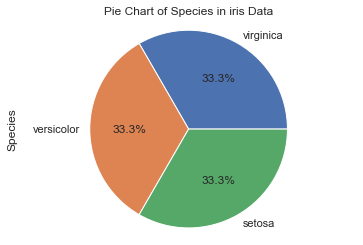

In [18]:
iris.Species.value_counts().plot.pie(autopct='%1.1f%%',
                                     title = "Pie Chart of Species in iris Data")
plt.axis('equal')
plt.show()

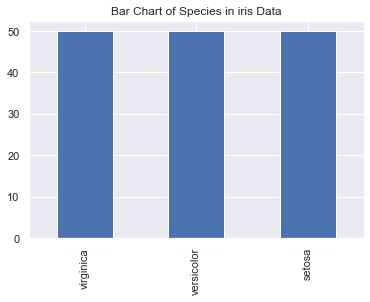

In [20]:
iris.Species.value_counts().plot.bar(title = "Bar Chart of Species in iris Data");

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
A survey asked 1,200 college students the following question: "With whom do you find it easiest to make friends?" (opposite sex, same sex or no difference).
<p>
1. Print the frequency table and table of percentages.
<p>
2. Draw a pie chart and bar chart for the data.
</div>

In [21]:
friends = pd.read_csv("../data/friends.csv")
friends.head()

,Friends
0,No difference
1,No difference
2,No difference
3,No difference
4,No difference


In [22]:
# MC 
print("The unique categories of friends are:") 
friends.Friends.unique()

The unique categories of friends are:


array(['No difference', 'Opposite sex', 'Same sex'], dtype=object)

In [23]:
# MC
print("The frequency table of friends are:")
friends_tab = friends.Friends.value_counts()
friends_tab

The frequency table of friends are:


No difference    602
Opposite sex     434
Same sex         164
Name: Friends, dtype: int64

In [24]:
# MC 
print("The percentages for each category of friends are:")
friends.Friends.value_counts(normalize=True)* 100

The percentages for each category of friends are:


No difference    50.166667
Opposite sex     36.166667
Same sex         13.666667
Name: Friends, dtype: float64

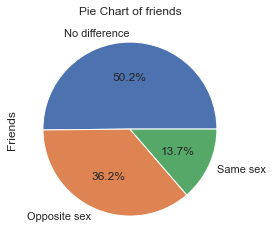

In [25]:
# MC 
friends_tab.plot.pie(autopct='%1.1f%%',title = "Pie Chart of friends");

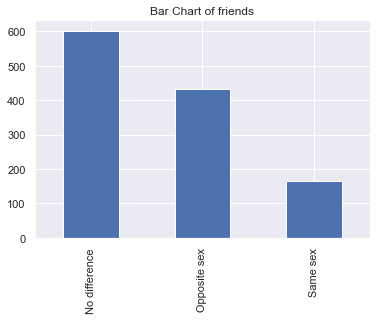

In [26]:
# MC
friends_tab.plot.bar(title = "Bar Chart of friends");

## B. One Numerical Variable <a name='one_numeric'></a>
For data that consists of one numerical variable, we can use numerical measures to represent the data. There are two main types of numerical measures - **measures of central tendency**, and **measures of dispersion/variability**.

### Measures of Central Tendency <a name='central_tendency'></a>
Measures of central tendency are used to describe the 'body' of a distribution by providing a reference point to its center. There are 3 measures of central tendency, namely the mean, median, and mode.

Let's begin by generating a random list of 20 integers from a uniform distribution with integers ranging from 0 to 8.

In [27]:
np.random.seed(42)

In [28]:
array_1 = np.random.choice(np.arange(0, 9), size = 20)
array_1

array([6, 3, 7, 4, 6, 2, 6, 7, 4, 3, 7, 7, 2, 5, 4, 1, 7, 5, 1, 4])

#### Mean
The **mean** for a set of numerical data is given by the formula:

$$\bar{x} = \frac{\sum{x}}{n}$$

where $\bar{x}$ is the mean, $n$ is the number of elements/data points, and $\Sigma$ denotes summation. It represents the center of a data set in the sense that the weight of the numbers to the left and right of the mean are equal.

`pandas` objects have a `mean` method: 

In [29]:
built_mean_pd = pd.Series(array_1).mean()
f"The mean of array_1 calculated using the pandas method is {built_mean_pd}"

'The mean of array_1 calculated using the pandas method is 4.55'

`numpy` provides a function `mean()` that calculates the mean. 

In [30]:
built_mean_np = np.mean(array_1)
f"The mean of array_1 calculated using the numpy function is {built_mean_np}"

'The mean of array_1 calculated using the numpy function is 4.55'

Let's compute the mean of `array_1` using the formula and show that the built-in function yields the same output.

In [31]:
manual_mean = np.sum(array_1)/len(array_1)
manual_mean
f"The mean of array_1 by manual computation is {manual_mean}"

'The mean of array_1 by manual computation is 4.55'

In [32]:
# Finally, we'll check if these values align
f"Is built_mean = manual_mean? {built_mean_np == manual_mean}"

'Is built_mean = manual_mean? True'

<div class = "alert alert-block alert-success">
<p>
<b>Pros:</b>
<p>
1. Low computational cost.
<p>
2. Gives a good representation of the 'center' as the sum of data points to the left and right of the mean are balanced.
<p>
<b>Cons:</b>
<p>
1. Easily influenced by outliers, i.e. values that are abnormally large/small compared to the rest of the set.
</div>

Let's examine the impact of an outlier on our set `array_1`. We'll simulate this by adding a large number to the set as below:

In [33]:
array_2 = np.append(array_1, 100)
array_2 

array([  6,   3,   7,   4,   6,   2,   6,   7,   4,   3,   7,   7,   2,
         5,   4,   1,   7,   5,   1,   4, 100])

Now let's compute the mean of the new set:

In [34]:
np.mean(array_2)

9.095238095238095

As we can see, there is a large swing in the mean (from 5.1 to ~9.62) due to the large value (100) that was added to the set. Here we say the mean is **sensitive** to outliers. As such, we should be careful about when we use the mean to describe a data set.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. The manager of a call center computes the mean number of calls attended to by an employee in an hour as a reference value to benchmark employee performance. We can safely use the mean in this scenario as we do not expect a sudden jump in the number of calls attended from employee to employee.
<p>
2. An analyst computes the mean salary of managers in a Fortune 500 company. Here the decision to use the mean is unwise as we expect that there may be a large gap in pay between senior and junior managers, which in turn may impact the value of the mean. 
</div>

#### Median 
The median of a numerical data set is the **center-most** number when your data is sorted in **ascending** order, i.e. from the smallest to largest. It can be computed in two ways:
1. If the data set has an **odd** number of observations, the median is the element in the **middle** that equally bisects the set such that the number of elements to the left and right are identical.
2. If the data set has an **even** number of observations, the median is the **mean** of the **middle** two elements when sorted in ascending order.

Unlike the mean, the median is **immune** to outliers. This behavior does come at a cost though - the median gives the physical center of a data set, i.e. it takes into account the location of a number in ascending order as compared to the rest of the data set, but ignores the weight of each value.

Take note that compared to the mean, the median is more computationally expensive as it requires us to sort the data set in ascending order first. As in the case for mean, we will show that the result from the built-in function is identical to that if we compute the median manually.

Let us begin by computing the median. As before, `pandas` objects have a method for computing the median: 

In [35]:
built_median_pd = pd.Series(array_1).median()
f"The median of array_1 calculated using the pandas method is {built_median_pd}"

'The median of array_1 calculated using the pandas method is 4.5'

Using `numpy`, we can compute the median using the function `median()`. 

In [36]:
# We can find the median of this same list using the median () function
built_median_np = np.median(array_1)
f"The median of array_1 calculated using the numpy function is {built_median_np}"

'The median of array_1 calculated using the numpy function is 4.5'

To compute the median manually, we must first determine the length of our data set (in this case `array_1`) so we can pick the appropriate method:

In [37]:
# How long is array_1? We need to know if it is odd or even to determine which strategy to follow
f"The length of array_1 is {len(array_1)}" 

'The length of array_1 is 20'

As the list contains an even number of elements (20), we should take the mean of the two middle (10th & 11th, or index 9 and 10) elements once sorted in ascending order.

In [38]:
array_1 = np.sort(array_1)
manual_median = (array_1[9] + array_1[10]) / 2
f"The median of array_1 by manual computation is {manual_median}"

'The median of array_1 by manual computation is 4.5'

In [39]:
manual_eq_built = manual_median == built_median_pd 
f"Is built_median = manual_median? {manual_eq_built}"

'Is built_median = manual_median? True'

Now suppose that the data set has an *odd* number of elements, e.g. `array_2`. Once again, we can compute the median manually by selecting the **center-most** element in the set when sorted in ascending order:

In [40]:
array_2

array([  6,   3,   7,   4,   6,   2,   6,   7,   4,   3,   7,   7,   2,
         5,   4,   1,   7,   5,   1,   4, 100])

In [42]:
math.floor(len(array_2)/2)

10

In [43]:
array_2 = np.sort(array_2)
manual_median_2 = array_2[math.floor(len(array_2)/2)]   # This indexes the 10th element 

f"The median of array_2 by manual computation is {manual_median_2}"

'The median of array_2 by manual computation is 5'

In [44]:
f"Is built_median_2 = manual_median_2? {np.median(array_2) == manual_median_2}"

'Is built_median_2 = manual_median_2? True'

<div class = "alert alert-block alert-success">
<p>
<b>Pros:</b>
<p>
1. Immune to outliers. Abnormally small/large values will not affect the median as it gives the physical 'center' of the data set.
<p>
<b>Cons:</b>
<p>
1. Does not take into account the weights of each element in the data set.
<p>
2. Computationally expensive compared to the mean. This becomes apparent when dealing with large data sets.
</div>

To illustrate the increase in computational complexity associated with calculating the median, vary the value of `N` in the following chuck of code by factors of `10` to see the increase in time taken to perform the calculations. User+Sys will tell you how much actual CPU time your process used.

In [45]:
N = 1000000

large_array = np.random.choice(np.arange(1000), size = N)

%time np.median(large_array)
%time np.mean(large_array)

CPU times: user 10 ms, sys: 702 µs, total: 10.7 ms
Wall time: 11.7 ms
CPU times: user 1.77 ms, sys: 255 µs, total: 2.02 ms
Wall time: 1.47 ms


499.477958

As we can see, the time taken to compute the median goes up significantly in comparison to the mean as the data set grows larger. This behavior is worth noting if you are working on large data sets and plan to integrate the median in your analyses. We would however like to point out that although beyond the scope of this course, there is a formal method for assessing the computational complexity of an algorithm ([read more](https://en.wikipedia.org/wiki/Computational_complexity)).

Due to its immunity against outliers, the median is the measure of choice when dealing with data sets that contain large gaps in the value of its elements. For example, consider `array_2` which is graphed below:

In [47]:
array_1

array([1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7])

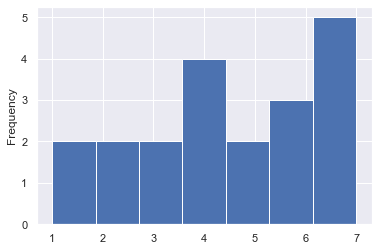

In [54]:
pd.Series(array_1).plot.hist(bins = 7);

In [55]:
array_2

array([  1,   1,   2,   2,   3,   3,   4,   4,   4,   4,   5,   5,   6,
         6,   6,   7,   7,   7,   7,   7, 100])

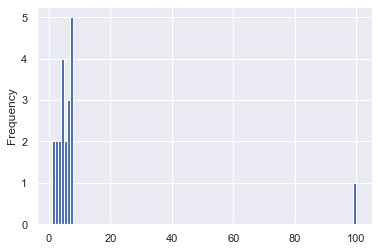

In [60]:
pd.Series(array_2).plot.hist(bins = 100);

In [61]:
print('Median of array_2 is', np.median(array_2))

print('Median of array_1 is', np.median(array_1))

Median of array_2 is 5.0
Median of array_1 is 4.5


The graph above is called a histogram, and is useful for examining numerical distributions (we'll learn how to construct these later in the course). As we can see from the histogram, the values in the data set go from 1 to 100, but the median ignores the distance between the numbers and focuses on the **physical location** instead. In other words, the **gaps** between values in our data set **do not affect** the median.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
Recall the example from the previous section where the analyst wanted to examine the distribution of salary of managers in a Fortune 500 company. Instead of using the mean, he would obtain a better representation of the 'center' of the salary data by using the median.
</div>

#### Mode
The mode of a numerical data set is the value that occurs **most often**. We can do this by selecting the element of the data set with highest **frequency**, i.e. rate of occurrence.

Pandas objects have a `mode` method to compute the mode. Just as in the previous sections, we will illustrate the computation using both the pre-built package and by manual computation.


In [64]:
print(array_1)
built_mode_pd = pd.Series(array_1).mode()
built_mode_pd

[1 1 2 2 3 3 4 4 4 4 5 5 6 6 6 7 7 7 7 7]


0    7
dtype: int64

In [65]:
array3 = pd.Series([1, 2, 3, 4, 5])
pd.Series(array3).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

We can also use the `mode` function from `statistics`:

In [66]:
# only returns the smallest number if more than one mode
built_mode_stat = mode(array_1)
built_mode_stat

7

Alternately, use the `most_common()` function of the `Counter` class: 

In [69]:
from collections import Counter
Counter(array_1).most_common(2)

[(7, 5), (4, 4)]

<div class = "alert alert-block alert-success">
<p>
<b>Pros:</b>
<p>
1. The mode is easy to interpret as it represents the element with the highest frequency. In a business context this can be the best selling product, staff member with the most positive reviews, etc.
<p>
2. Can also be used for categorical data - the mode is the category with the highest frequency.
<p>
<b>Cons:</b>
<p>
1. Does not take into account the weights nor physical location of each element in the data set.
</div>

If a data set has only **one** value for the mode, it is called **unimodality** or a **unimodal distribution**.

It is worth noting that a data set may contain **more than one** mode. As such, we **cannot assume** unimodality for a data set - this is reflected in the list comprehension used to compute `values`. Take for example the following **bimodal** distribution, which contains 2 modal elements:

In [70]:
bimodal_dist = [binom(8,x) + binom(8, x-4) for x in np.arange(0, 12)]

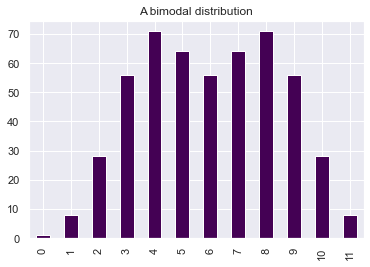

In [71]:
pd.Series(bimodal_dist).plot.bar(colormap = "viridis", title = "A bimodal distribution");

We can also have **trimodal** (3 modal elements) or **multi-modal** (4 or more modal elements) sets. Given below is `array_3`, an example of a trimodal set:

In [72]:
# mode() returns error in case of more than one mode

array_3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,5,5,6,7,8,8,9,9,9,100]

array_3_mode, _ = mode(array_3)

f"The mode of list_3 is {array_3_mode}"

TypeError: cannot unpack non-iterable int object

In [73]:
pd.Series(array_3).mode()

0    1
1    2
2    3
dtype: int64

In [74]:
#Solution1 for multimodal array:
Counter(array_3).most_common()

[(1, 5),
 (2, 5),
 (3, 5),
 (9, 3),
 (4, 2),
 (5, 2),
 (8, 2),
 (6, 1),
 (7, 1),
 (100, 1)]

In [75]:
my_list=['a', 'a', 'b','b','c']
x = list(my_list)

In [76]:
x

['a', 'a', 'b', 'b', 'c']

In [77]:
set(x)

{'a', 'b', 'c'}

In [78]:
list(set(x))

['c', 'a', 'b']

In [79]:
('b', x.count('b'))

('b', 2)

In [80]:
value_counts = [(i, x.count(i)) for i in list(set(x))]

In [81]:
value_counts

[('c', 1), ('a', 2), ('b', 2)]

In [84]:
elem=value_counts[0]
elem[1]

1

In [85]:
max_count = np.max([elem[1] for elem in value_counts])
max_count

2

In [86]:
values = [i[0] for i in value_counts if i[1] == max_count]
values

['a', 'b']

In [87]:
#Solution2 for multimodal array:

def mode_man(my_list,):
    x = list(my_list)
    
    # obtain unique values and their counts as a list of tuples
    value_counts = [(i, x.count(i)) for i in list(set(x))]
    
    # calculate the maximum count
    max_count = np.max([elem[1] for elem in value_counts])
    
    # return the values of each unique value that appears as frequently as max_count
    values = [i[0] for i in value_counts if i[1] == max_count]
    return values, max_count

In [88]:
values, max_count = mode_man(array_3)

In [89]:
values, max_count

([1, 2, 3], 5)

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. The manager of a convenience store computes the mode of products he sells to identify his best-selling products.
<p>
2. The Road Transport Department tallies the number of fatal car accidents across various regions in Malaysia and computes the mode to identify which regions are the most dangerous.
</div>

#### Choosing the Best Measure of Central Tendency
Choosing the best measure of central tendency is subject to the context of the business problem and the type of data in hand, but the following considerations can serve as a general guideline:
1. If there are no outliers in the data, the mean gives the best approximation as it takes into account *both* physical location and weights.
2. If outliers are present in the data, the median serves as a good approximation as it is robust to outliers.
3. If the data is categorical or the business problem involves identifying the data point with highest occurrence, the mode should be used.

In the following example, we show how removing an outlier impacts the the measures of central tendency we have discussed.

In [90]:
f"list_3: {array_3}"

'list_3: [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9, 100]'

In [91]:
print(f"""
median of array_3: {np.median(array_3)} 
mean of array_3: {np.mean(array_3)} 
mode of array_3: {mode_man(array_3)[0]}
      """)


median of array_3: 3.0 
mean of array_3: 7.555555555555555 
mode of array_3: [1, 2, 3]
      


The set `array_3` contains an abnormally large value (24) in comparison to the rest of the values in the set. We classify this as an outlier and intend to remove it from the set.

In [92]:
array_3e = array_3[:-1]
array_3e

print(f"""
median of array_3e: {np.median(array_3e)} 
mean of array_3e: {np.mean(array_3e)} 
mode of array_3e: {mode_man(array_3e)[0]}
""")


median of array_3e: 3.0 
mean of array_3e: 4.0 
mode of array_3e: [1, 2, 3]



Removing the outlier, we see that the mean of the set has moved closer to the median, whereas the median has remain unchanged. This indicates that the median is a better approximation for the true center of the data set. The mode remains unchanged as the most frequently occurring numbers stay the same for both sets.

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
In each of these scenarios, how would you interpret the following measures:
<p>
1. The mean of rainfall in KL in 2017 was 250 mm.
<p>
2. The median population age in Malaysia is 27.7 years.
<p>
3. The modal income of individuals in Malaysia was $10,620 (USD) in 2017.
</div>

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
Using the <code>iris</code> dataset, calculate the measures of central tendency for each variable (column) and interpret the results.
</div>

In [93]:
# MC 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sepal.Length  150 non-null    float64 
 1   Sepal.Width   150 non-null    float64 
 2   Petal.Length  150 non-null    float64 
 3   Petal.Width   150 non-null    float64 
 4   Species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [94]:
# MC 
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
# MC 
iris['Sepal.Length'].mean(), iris['Sepal.Length'].median(), iris['Sepal.Length'].mode()

(5.843333333333335,
 5.8,
 0    5.0
 dtype: float64)

In [96]:
# MC
iris['Petal.Length'].mean(), iris['Petal.Length'].median(), iris['Petal.Length'].mode()

(3.7580000000000027,
 4.35,
 0    1.4
 1    1.5
 dtype: float64)

In [97]:
# MC 
iris.Species.mode()

0        setosa
1    versicolor
2     virginica
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [98]:
# MC
iris.mode()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


### Measures of Dispersion/Variability <a name='dispersion'></a>
Though immensely useful, the center of a data set does not paint a clear enough picture to properly visualize the behavior of a data set. Consider the following comparison:


### Example:
Do the following variables $v$ and $w$ have similar patterns?
![Figure 3: Measures of central tendency are not enough](../images/CentTend.png)

As we see in the figure above, two sets of data can share the same measures of central tendency (mean & median in this case) yet still behave very differently. As such, we are also interested in examining how **spread out** the data is from the center. Numerical measures that measure this spread are known as **measures of dispersion** or **measures of variability**.

In this section, we will discuss the following 3 measures of dispersion: 
1. Range
2. Percentiles, Interquartile Range (IQR), Outliers, 
5. Variance & Standard Deviation

#### Range
Range is the simplest measure of dispersion, and is defined as the difference between the smallest and largest values in a set of data:

$$Range = x_{largest} - x_{smallest}$$

Suppose we have the following data on the number of siblings of individuals from 25 families:

In [100]:
# Lets pretend we have collected data on the number of siblings 
# everyone in the classroom has. This is saved as no_siblings

no_siblings = [1, 0, 2, 0, 3, 1, 2, 4, 2, 
              2, 0, 1, 2, 5, 2, 1, 2, 5, 7, 2, 
              3, 0, 0, 1, 3]

As per the formula, we can compute the range of this data set by taking the difference between the largest and smallest values in the data set:

In [101]:
np.max(no_siblings) - np.min(no_siblings) # maximum - minimum of our data

7

Range is often the first measure of dispersion calculated because it relies on only the smallest and largest elements in the set, and gives a quick overall description of how spread out the data is. However, due to its dependence on these two values (minimum and maximum), the range can be impacted by the presence of an outlier. Consider the following case where we add an outlier to the set `no_siblings`:

In [102]:
no_siblings.append(45)

In [103]:
f"The range of no_siblings is {max(no_siblings) - min(no_siblings)}"

'The range of no_siblings is 45'

As we can see, the range here has spiked due to the presence of the outlier. As such, any information gathered based on the range of a data set should be cross-checked with the presence of outliers in the set - if an outlier is to be excluded, recompute the range as necessary.

<div class = "alert alert-block alert-success">
<p>
<b>Pros:</b>
<p>
1. Easy to calculate, only requires knowledge of the smallest (minimum) and largest (maximum) values in a data set.
<p>
2. Gives a good overview of how spread out the data is.
<p>
<b>Cons:</b>
<p>
1. Can be influenced by outliers.
</div>

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. A project manager computes the range on the data set of previous project milestones to plan the working schedule for future iterations.
<p>
2. A HR manager computes the range of time spent by employees to complete a given task to determine if there is a need for training/upskilling.
</div>

#### Quantiles
Quantiles are cutoff points across the range of data that are evenly spaced. They are usually computed based on the data being sorted in ascending order and being split into equal portions. Two commonly used quantiles are **percentiles** and **quartiles**.

A percentile is a value that is **greater than** a given **percentage** of observations. In other words, the data set is sorted in **ascending** order and split into 100 **equally-spaced** parts, with each percentile representing a cutoff point.

Quantiles can be computed using the pandas object method `quantile` and the `numpy` functions `percentile` and `quantile`. Using the `no_siblings` set from the last example, let's calculate the 27th percentile.

In [104]:
np.quantile(no_siblings, .27)

1.0

In [105]:
np.percentile(no_siblings, 27)

1.0

Here we see that the value in the data set corresponding to the 27th percentile is 1. In other words, 27% of the data in this set has value 1 or lower.

The `pandas` method `quantile` and the `np.quantile` function also supports computing multiple quantiles at once by passing through a vector argument. Suppose we are interested in finding the 30th, 55th, and 80th percentiles of our data:

In [106]:
pd.Series(no_siblings).quantile((.30, .55, .8))

0.30    1.0
0.55    2.0
0.80    3.0
dtype: float64

In [107]:
np.quantile(no_siblings,[.30, .55, .8])

array([1., 2., 3.])

In [108]:
np.percentile(no_siblings, [30, 55, 80])

array([1., 2., 3.])

Based on the resulting output, we can conclude that:
1. Less than 30% of the individuals in the data set have less than 1 (no) sibling.
2. Less than 55% of the individuals in the data set have less than 2 siblings.
3. Less than 80% of the individuals in the data set have less than 3 siblings.

**Quartiles** on the other hand are obtained when the data is split evenly across **4** portions across its entire range. The 4 quartiles are as follows:
1. 1st Quartile, $Q_1$ - bottom 25% of oberservations, i.e. the *25th percentile*.
2. 2nd Quartile, $Q_2$ - bottom 50% of oberservations, i.e. the *50th percentile*. The 2nd quartile also corresponds to the *median*.
3. 3rd Quartile, $Q_3$ - bottom 75% of oberservations, i.e. the *75th percentile*.
4. 4th Quartile, $Q_4$ - all oberservations, i.e. the *100th percentile*.

<div class = "alert alert-block alert-success">
<p>
<b>Pros:</b>
<p>
1. Allows the data set to be segmented for more detailed analysis on the distribution of data.
<p>
<b>Cons:</b>
<p>
1. Quantiles can sometimes be difficult to interpret if the resulting value is non-integer.
</div>

The figure below summarizes the relationship between the percentiles and quartiles:

![Figure 4: Quantiles](../images/Quantiles.png)

Computation of the quartiles can also be done manually by taking the median twice in succession - this process is illustrated in the figure below:

![Figure 5: Quantiles Example](../images/Q1Q3.png)

Just like some of the previous functions, we can compute the quantiles manually by multiplying the number of elements in the set by the desired quantile and rounding up to the nearest index number. Selecting the element of that index from the ordered data set will yield the desired quantile. To illustrate this, we compute the 30th percentile manually as follows:

In [113]:
len(siblings_sorted)

26

In [114]:
np.floor(len(siblings_sorted) * .3) 

7.0

In [110]:
siblings_sorted = sorted(no_siblings)

# check if this code is OK! 
p30 = np.floor(len(siblings_sorted) * .3) 
siblings_sorted[np.int64(p30)]

1

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. An Ivy League university selects only the students who placed in the top 5th percentile of SAT scores for admission.
<p>
2. A regional manager identifies low-performing stores by selecting all stores whose revenue for 2017 falls within the 1st quartile in the company's annual sales data set.
</div>

#### Interquartile Range
The interquartile range (IQR for short) is a measure of spread for the **middle 50%** of data. As extreme values occur at the low/high end of the spectrum, the interquartile range gives a good approximation for a distribution as it quantifies the dispersion for only the central portion of the data, making this measure robust to outliers.

The IQR can be computed by taking the difference between the 1st and 3rd quartiles, as summarized in the figure below:

![Figure 5: Interquartile Range (IQR)](../images/IQR.png)

Computation of this measure can be done using the `scipy` function ``scipy.stats.iqr``. The code segments below illustrate the use of both manual computation and the `scipy` function, comparing the results obtained.

In [115]:
q1, q3 = np.quantile(no_siblings,[.25, .75])
manual_iqr = q3 - q1
f"The IQR of no_siblings by manual compuation is {manual_iqr}"

'The IQR of no_siblings by manual compuation is 2.0'

In [116]:
scipy_iqr = iqr(no_siblings)
f"The IQR of no_siblings using the scipy function is {scipy_iqr}"

'The IQR of no_siblings using the scipy function is 2.0'

In [117]:
f"Is manual_iqr = scipy_iqr? {manual_iqr == scipy_iqr}"

'Is manual_iqr = scipy_iqr? True'

#### Determination of Outliers using Tukey's Method
As mentioned in previous sections, an outlier is a value which is extremely small/large in comparison to the other values in a data set. Though removing outliers is context-sensitive, there exist systematic processes to identify outliers using measures of dispersion. In this course, we choose to highlight one commonly used technique called **Tukey's Method**.

Tukey's Method defines outliers as values that fall outside the 1st and 3rd quartiles by 1.5 times the IQR. These boundaries are known as lower and upper **fences** and represent the outer limits of reasonable value to be included in the data set. The fences can be computed using the following formulae:

$$LF = Q1 - 1.5 \times IQR$$
$$UF = Q3 + 1.5 \times IQR$$

![Figure 6: Outliers](../images/Outliers.png)

To strengthen these concepts, let's practice computing the fences (and some other numerical measures).

<div class = "alert alert-block alert-warning">
<b>Guided Exercise</b>
<p>
Compute the following measures for the <code>no_siblings</code> data set:
<p>
1. Minimum
<p>
2. First quartile, $Q_1$
<p>
3. Median
<p>
4. Third quartile, $Q_3$
<p>
5. Maximum
<p>
6. Range
<p>
7. IQR
<p>
8. Lower Fence
<p>
9. Upper Fence
</div>

In [120]:
sorted(no_siblings)


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 7, 45]

In [121]:
np.mean(no_siblings)

3.6923076923076925

In [118]:
# MC

print(f"""
The minimum is {min(no_siblings)}
The first quartile is {np.quantile(no_siblings,.25)}
The median is {np.median(no_siblings)}
The third quartile is {np.quantile(no_siblings,.75)}
The maximum is {max(no_siblings)}
The range is {max(no_siblings) - min(no_siblings)}
The IQR is {iqr(no_siblings)}
The lower fence is {np.quantile(no_siblings,.25) - 1.5 * iqr(no_siblings)}
The upper fence is {np.quantile(no_siblings,.75) + 1.5 * iqr(no_siblings)}
""")

None

The minimum is 0
The first quartile is 1.0
The median is 2.0
The third quartile is 3.0
The maximum is 45
The range is 45
The IQR is 2.0
The lower fence is -2.0
The upper fence is 6.0



Based on the fences computed, the value 7 should be classified as an **outlier**.

**Note:**
When presented together, the Minimum, 1st Quartile, Median, 3rd Quartile, and Maximum are known as a **Five Figure Summary**.

<div class = "alert alert-block alert-success">
<p>
<b>Pros:</b>
<p>
1. Provides a clear boundary on which values should/shouldn't be classified as outliers.
<p>
<b>Cons:</b>
<p>
1. Fails for small sample sizes.
</div>

The code segment below illustrates a case in which Tukey's method fails to identify the value 20,000 as an outlier due to an extremely small sample size:

In [122]:
small_sample = [1, 50, 20000]

print(f"""
The IQR is {iqr(small_sample)}
The lower fence is {np.quantile(small_sample, .25) - 1.5 * iqr(small_sample)}
The upper fence is {np.quantile(small_sample, .75) + 1.5 * iqr(small_sample)}
""")


The IQR is 9999.5
The lower fence is -14973.75
The upper fence is 25024.25



<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. An automated early warning system can be programmed to flag abnormal behavior if sensors record values outside of the prescribed fences.
<p>
2. A schoolteacher can identify students who exhibit exceptional performance by flagging those whose scores are past the upper fence for the entire school.
</div>

#### Variance
The variance of a data set is a numerical representation of how much the data is spread out from the mean. For a **sample** of data, it is given by the formula:

$$\mathrm{Var}(x) =  \frac{\sum (x - \bar{x})^2}{n - 1}$$

where $\bar{x}$ is the mean and $n$ is the sample size, i.e. number of elements in the data set.

In [123]:
x=[1.5,2.1,4.1,3.7,3.2]

In [124]:
x_bar=np.mean(x)
x_bar

2.9199999999999995

In [128]:
np.sum((x-x_bar)**2)/(len(x)-1)

1.192

In [129]:
def variance(x): 
    series_mean = np.mean(x)            # Calculate our mean
    deviation = x - series_mean         # Subtract mean from all observations
    squared_dev = deviation ** 2        # Square these values
    sum_squared_dev = sum(squared_dev)  # Sum the squares
    var = sum_squared_dev / (len(x)-1)  # divide by number of observations
    return var


From the formula, we can see that the variance is simply the average squared distance from the mean of the data set. A larger variance indicates that the data is more spread out from the mean, whereas a smaller variance indicates that the data is concentrated around the mean value.

Let's take another look at the `iris` data set.

In [130]:
# Take a look at the dataset
iris.head() # head() shows us the first few observations

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Using the formula, we can manually compute the variance of `Sepal.Length` for all observations in our dataset.

In [131]:
sepal_mean = np.mean(iris.loc[:, "Sepal.Length"])
subtracted_mean = iris.loc[:, "Sepal.Length"] - sepal_mean
square_diff = subtracted_mean ** 2
var_manual_1 = np.sum(square_diff)/(len(square_diff) - 1)
var_manual_1

0.6856935123042507

In [132]:
var_manual_2 = variance(iris.loc[:, "Sepal.Length"])
var_manual_2

0.6856935123042505

`pandas` Series has a method `var()` that computes the sample variance: 

In [133]:
pd_var = iris.loc[:, "Sepal.Length"].var()
pd_var

0.6856935123042505

`numpy` also provides a function to compute the variance, namely `var`. By default, `np.var` calculates the variance with 0 Delta degrees of freedom. As we are concerned with the **sample** variance, we need to set the `ddof` argument equal to 1. 

In [134]:
np_var = np.var(iris.loc[:, "Sepal.Length"], ddof = 1)
np_var

0.6856935123042505

In [135]:
variance(iris.loc[:, "Sepal.Length"])==var_manual_1

False

Let's compare the values generated by our manual computations and the built-in function.

In [137]:
# numpy and formula-based methods may not be equal because of precision 
from math import isclose

In [138]:
print(f"""
Is pd_var = built_var? {isclose(var_manual_1, variance(iris.loc[:, "Sepal.Length"]))}
Is np_var = built_var? {isclose(np_var, var_manual_1)}
""")


Is pd_var = built_var? True
Is np_var = built_var? True



#### Standard Deviation
The standard deviation is the most commonly used measure of dispersion due to its easy interpretability. It is defined as the square root of the variance:

$$s = \sqrt{\mathrm{Var}(x)}$$

The standard deviation is usually in the same units as the observations in a data set, and hence it tends to be used more often than the variance itself. 

Let's compare the results of using the formula and the built-in function.

Again, `pandas` objects have a `std()` method to calculate the sample standard deviation: 

In [140]:
sd_manual = np.sqrt(var_manual_1)
sd_built = iris.loc[:, 'Sepal.Length'].std()

f"Is sd_manual = sd_built? {isclose(sd_manual, sd_built)}"

'Is sd_manual = sd_built? True'

In [141]:
sd_manual, sd_built

(0.828066127977863, 0.8280661279778629)

In `numpy`, the standard deviation can be computed using the `std` function. Note that the `numpy` function computes the **population** standard deviation by default, i.e. there is no degrees-of-freedom adjustment. To estimate the **sample** standard deviation, do the following: 

In [142]:
np.std(iris.loc[:, 'Sepal.Length'], ddof = 1)

0.8280661279778629

### Visual Tools

#### Boxplot
The Five Figure Summary is often visualized using a **box and whisker plot** (or **boxplot** for short). Boxplots allow us to view the distribution of the entire variable in terms of its quartiles and decide on cutoff points for outliers.

A boxplot consists of a body with 3 lines representing the 1st, 2nd, and 3rd quartiles of the data set. Whiskers protrude from the boxplot up to the smallest/largest values *within* the upper and lower fences, with outliers indicated as disconnected points. The length of the boxplot's body is that of the IQR, so comparing boxplots side-by-side allows us to compare distributions in terms of both their central tendency and variation.

Let's start with a simple example - a boxplot for the data set `no_siblings`:

In [143]:
# Lets pretend we have collected data on the number of siblings 
# everyone in the classroom has. This is saved as no_siblings

no_siblings = [1, 0, 2, 0, 3, 1, 2, 4, 2, 
              2, 0, 1, 2, 5, 2, 1, 2, 5, 7, 2, 
              3, 0, 0, 1, 3]

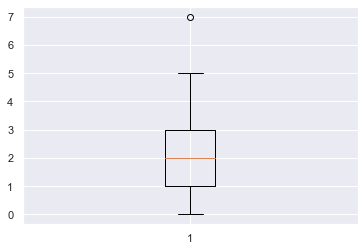

In [144]:
# Lets plot a boxplot with our sibling data from before
plt.boxplot(no_siblings);

We can clearly see from our boxplot that the median is 2, the 1st and 3rd quartiles are 1 and 3 respectively, and there exists an outlier, 7, in our data set.

Now let's compare two distributions side-by-side using `array_1` and `array_3`:

In [145]:
array_1

array([1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7])

In [146]:
array_3

[1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 7,
 8,
 8,
 9,
 9,
 9,
 100]

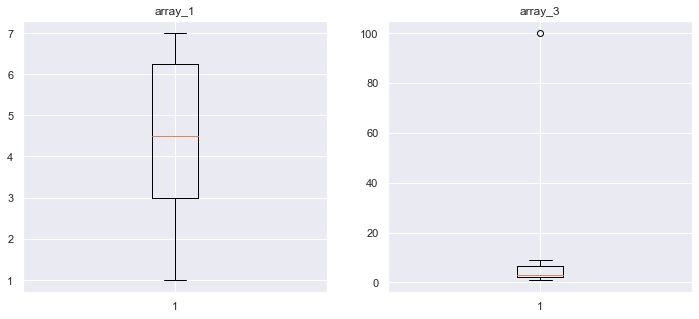

In [147]:
fg, ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].boxplot(array_1)
ax[0].set_title('array_1')
ax[1].boxplot(array_3)
ax[1].set_title('array_3');

Here we see that there is a stark difference between the distributions for `array_1` and `array_3`. They are both centered at different (median) values, and the spread is dissimilar. `array_3` also contains an outlier, something that is not present in `array_1`.

#### Histogram

A **histogram** is similar to a bar chart, but works by separating numeric values according to their count/frequency. In lieu of categories, we use equal-sized intervals called **bins** to group values together. `pandas` Series have a method for histograms, `hist()`: 

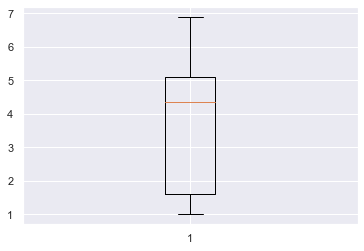

In [148]:
plt.boxplot(iris.loc[:, 'Petal.Length']);

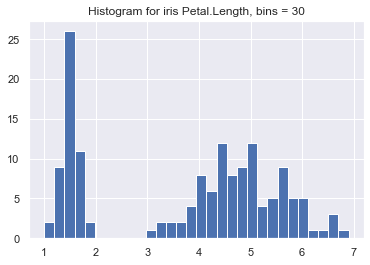

In [149]:
iris.loc[:, 'Petal.Length'].hist(bins = 30)
plt.title('Histogram for iris Petal.Length, bins = 30' )
plt.show()

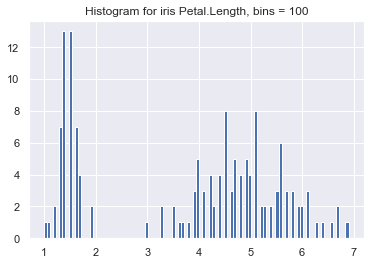

In [150]:
iris.loc[:, 'Petal.Length'].hist(bins = 100)
plt.title('Histogram for iris Petal.Length, bins = 100' )
plt.show()

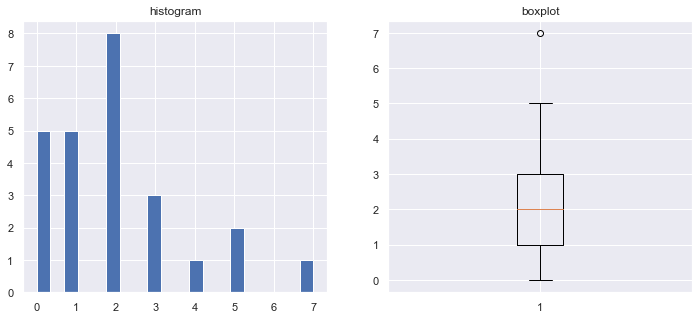

In [157]:
fg, ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].hist(no_siblings,bins=20)
ax[0].set_title('histogram')
ax[1].boxplot(no_siblings)
ax[1].set_title('boxplot');

Selection of an optimal bin width is subjective - a smaller width gives more detail but results in a messier output, whereas a larger width can result in cleaner output but loses visual detail. Try experiment with the bin widths in the above code to see how it affects the output.

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
Using the <code>iris</code> dataset:
<p>
1. Calculate the Range, Quartiles, IQR, number of outliers, variance & standard deviation for <code>Petal.Length</code>.
<p>
2. Draw a boxplot for <code>Petal.Length</code>.
<p>
3. Draw a histogram for <code>Petal.Length</code>.
</div>

In [158]:
pl = iris.loc[:, 'Petal.Length']

In [159]:
pl.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal.Length, dtype: float64

In [160]:
# MC

pl.max()-pl.min()
q1_pl, q3_pl = pl.quantile((.25, .75))
range_pl = q3_pl - q1_pl
iqr_pl = iqr(pl)
lf_pl = q1_pl - 1.5 * iqr_pl
uf_pl = q3_pl + 1.5 * iqr_pl
outliers_pl = pl[((pl < lf_pl) | (pl > uf_pl))]
n_outliers_pl=len(outliers_pl)

In [161]:
outliers_pl

Series([], Name: Petal.Length, dtype: float64)

In [162]:
# MC

print(f"""
The range of Petal.Length is {pl.max() - pl.min()}
The first quartile of Petal.Length is {pl.quantile(.25)}
The third quartile of Petal.Length is {pl.quantile(.75)}
The IQR of Petal.Length is {iqr_pl}
The lower fence of Petal.Length is {lf_pl}
The upper fence of Petal.Length is {uf_pl}
The number of outliers of Petal.Length is {n_outliers_pl}
The outliers of Petal.Length are {outliers_pl.values}
The variance of Petal.Length is {pl.var()}
The standard deviation of Petal.Length is {pl.std()}
""")


The range of Petal.Length is 5.9
The first quartile of Petal.Length is 1.6
The third quartile of Petal.Length is 5.1
The IQR of Petal.Length is 3.4999999999999996
The lower fence of Petal.Length is -3.649999999999999
The upper fence of Petal.Length is 10.349999999999998
The number of outliers of Petal.Length is 0
The outliers of Petal.Length are []
The variance of Petal.Length is 3.1162778523489942
The standard deviation of Petal.Length is 1.7652982332594667



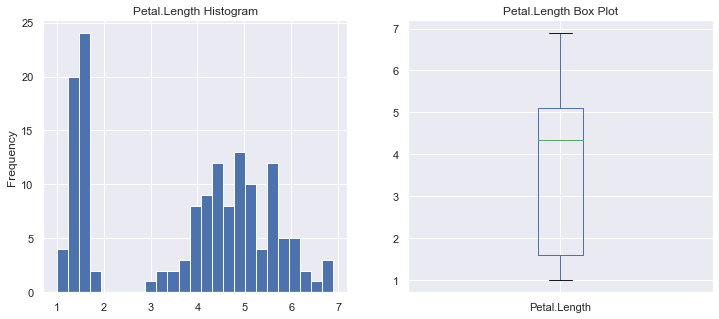

In [164]:
# MC 

fg, ax = plt.subplots(ncols = 2, figsize=(12,5))
pl.plot.hist(bins = 25, title = "Petal.Length Histogram", ax = ax[0])
pl.plot.box(title = "Petal.Length Box Plot", ax = ax[1]);

# 3. Data Exploration: Examining Relationships <a name="data_relationship"></a>
One of the core skills in exploratory data analysis is examining the relationships between variables in a data set. In many cases, we wish to establish a basis for cause and effect that can be further investigated. By examining the relationship between variables we can develop a clearer understanding of how one affects the other, allowing us to narrow down on interesting portions of our data.

In this section, we will look at pairs of variables and explore their relationship (or lack thereof) using numerical summaries and visual displays. For each pair, we designate one variable as explanatory (cause) and one as response (effect). In practice, the choice of these designations is subject to the context of the business problem in question.

## A. Categorical Explanatory and Response Variables <a name="ctoc"></a>
If both the explanatory and response variables are categorical in nature, we can utilize **two-way tables**, **conditional percentage tables**, or **multibar charts** to compare the variables head-to-head.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. Are the smoking habits of a person (Yes/No) related to the person's gender?
<p>
2. Is there a relationship between the type of light a baby sleeps with (No Light/Night light/Lamp) and whether or not the child develops nearsightedness?
</div>

Let's use the `nightlight` data set to see if we can answer the 2nd question in our example above.

### Two-way Tables (Cross-tabulation)
**Cross-tabulation** involves forming tables where one the responses of one variable is sorted by columns, and the other is sorted by rows. The observations in each cell then become the count for the categories in a specific row & column combination. These tables, also known as **two-way tables** can be formed using `pd.crosstab()`. 

In [165]:
nightlight = pd.read_csv('../data/nightlight.csv')
nightlight.head()

,Light,Nearsightedness
0,no light,No
1,night light,No
2,lamp,No
3,no light,No
4,no light,No


In [166]:
nightlight_tab = pd.crosstab(nightlight.loc[:, "Light"], 
                             nightlight.loc[:, "Nearsightedness"])
nightlight_tab

Nearsightedness,No,Yes
Light,,
lamp,34,41
night light,153,79
no light,155,17


### Conditional Percentage Tables
**Conditional percentage tables** are similar to two-way tables, with the counts converted into percentages. They are useful for highlighting disparities in proportions between categories as illustrated in the following examples. Using `pd.crosstab()`, they can be constructed by setting the `normalize` argument to `index`, `columns`, or `"all"`: 

In [167]:
pd.crosstab(nightlight.loc[:, "Light"], 
            nightlight.loc[:, "Nearsightedness"], 
            normalize = "all") * 100

Nearsightedness,No,Yes
Light,,
lamp,7.098121,8.559499
night light,31.941545,16.492693
no light,32.359081,3.549061


To calculate row-wise percentages, normalize by `"index"`:

In [168]:
pd.crosstab(nightlight.loc[:, "Light"], 
            nightlight.loc[:, "Nearsightedness"], 
            normalize = "index") * 100

Nearsightedness,No,Yes
Light,,
lamp,45.333333,54.666667
night light,65.948276,34.051724
no light,90.116279,9.883721


and for column-wise percentages, normalize by `"column"`: 

In [169]:
pd.crosstab(nightlight.loc[:, "Light"], 
            nightlight.loc[:, "Nearsightedness"], 
            normalize = "columns") * 100

Nearsightedness,No,Yes
Light,,
lamp,9.941520,29.927007
night light,44.736842,57.664234
no light,45.321637,12.408759


### Multibar Chart
A **multibar chart** is a paired bar chart where one variable is used as the x-axis, and the other is overlaid as categories spanning the first variable. This can be done using the `plot.bar()` method on the resulting DataFrame from `pd.crosstab()`. 

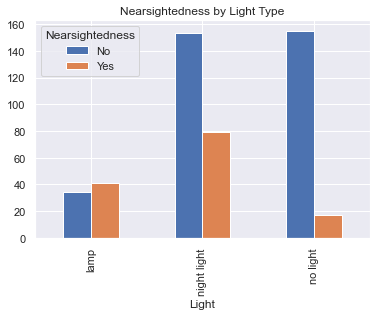

In [170]:
nightlight_tab.plot.bar(title = "Nearsightedness by Light Type");

## B. Quantitative explanatory and categorical response variables <a name="ctoq"></a>

In the case of categorical explanatory variables with quantitative response variables, we can use numerical summaries and boxplots as we previously in the section on numerical variables. Here however, the focus will be on relating the relationship between the categorical and quantitative variables, and not just examining a single distribution.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. Is there a relationship between gender (Male/Female) and test scores on a particular standardized test?
<p>
2. How is the number of calories in a hot dog related to (or affected by) the type of hot dog (Beef/Meat/Poultry)? In other words, are there differences in the number of calories between the three types of hot dogs?
</div>

### Numerical Summaries
To explore the concept of using a numerical summary, let's take a look at the `OrangeJuice_quality` data set to see if the amount of added sugar and a juice's rated quality are related.

In [171]:
Juice = pd.read_csv('../data/OrangeJuice_quality.csv' )
Juice.head(10)

,rank,quality,sugar
0,6.0,Fair,4.724228
1,6.0,Fair,5.129743
2,6.0,Fair,4.208500
3,6.0,Fair,4.930204
4,6.0,Fair,5.172344
5,6.0,Fair,3.965636
6,6.0,Fair,6.663196
7,6.0,Fair,6.994249
8,6.0,Fair,6.505791
9,6.0,Fair,3.574032


In [172]:
Juice = Juice.drop('rank', axis=1)

In [173]:
Juice.head()

,quality,sugar
0,Fair,4.724228
1,Fair,5.129743
2,Fair,4.208500
3,Fair,4.930204
4,Fair,5.172344


In [174]:
Juice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quality  1599 non-null   object 
 1   sugar    1599 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


Using the `describe()` method in conjunction with `groupby()` we can generate a table that summarizes the numerical results associated with each category of our explanatory variable: 

In [175]:
Juice.groupby('quality').describe()

sugar                                                              \
         count      mean       std       min       25%       50%       75%   
quality                                                                      
Fair     637.0  4.879620  1.165740  3.004846  3.820813  4.851717  5.867099   
Good     217.0  6.114503  1.192239  4.043415  5.133470  6.031038  7.149408   
Poor     745.0  3.918871  1.215765  0.181408  2.927208  3.847140  4.908531   

                   
              max  
quality            
Fair     6.996698  
Good     8.818321  
Poor     5.993003

We see here that the average amount of sugar is higher for Juices that rate higher on the quality scale. The distribution of values however is heavy to one side for the `Good` and `Poor` categories, which indicates that we may want to have a closer look at these two to see if there are any outliers affecting what we see.

### Side-by-Side Boxplots
As we saw in the comparison of `array_1` and `array_3`, we can compare boxplots side-by-side to see if their distributions are similar. If your data set includes a categorical explanatory variable, setting this variable as the x axis will automatically yield a **side-by-side boxplot** without the need to stack the boxplots together manually.

Let's have another look at the residual sugar data:

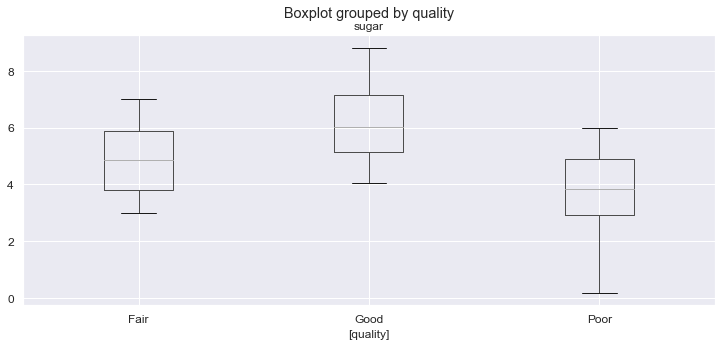

In [176]:
Juice.boxplot(by = "quality",fontsize=12, figsize = (12, 5))
plt.show()

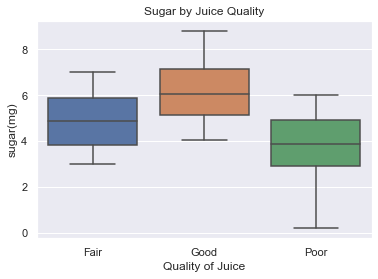

In [177]:
sns.boxplot(x = "quality", y = "sugar", data = Juice).set_title("Sugar by Juice Quality")
plt.ylabel('sugar(mg)')
plt.xlabel('Quality of Juice');

Aha! We see that although there seems to be a marked difference in the residual sugar content of each category, there also seem to be quite a few outliers in our set. How do you think removing these outliers will affect our data set?

## C. Quantitative Explanatory and Quantitative Response<a name="qtoq"></a>
If both our explanatory and response variables are quantitative, we can investigate the existince of a relationship by gauging the increment/decrement in the response variable with respect to changes in the explanatory variable. This is best gauged using a **scatter plot**, and can further be refined using **Pearson's correlation coefficient**.

<div class = "alert alert-block alert-info">
<b>Example</b>
<p>
1. Can we predict a student's freshman year GPA from his/her SAT score?
<p>
2. What is the relationship between driver's age and the legibility distance of a sign (the maximum distance at which the driver can read a sign)?
</div>

### Scatter Plots
**Scatter plots** are the go-to tool for determining the nature of relationship between two quantitative variables. They are obtained by plotting one variable against another on the Cartesian plane, with points scattered across the xy-coordinates according to the data set.

Let's examine if there is any relationship between a student's math score and his/her reading score for a group of students as given in the `exams` data set. First and foremost, let's have a quick look around at the data to see what we're working with:

In [178]:
examScore = pd.read_csv("../data/exams.csv")
examScore.head()

,math.score,reading.score,writing.score
0,75,85,88
1,42,58,50
2,43,43,30
3,70,57,56
4,63,75,78


In [179]:
examScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   math.score     100 non-null    int64
 1   reading.score  100 non-null    int64
 2   writing.score  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


Alright. So we see that there are three variables - `math.score`, `reading.score`, and `writing.score`. Let's have a look at the math and reading scores.

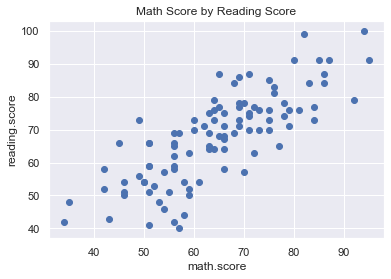

In [180]:
plt.scatter(x = "math.score", y = "reading.score", data = examScore)
plt.title("Math Score by Reading Score")
plt.xlabel('math.score')
plt.ylabel('reading.score');

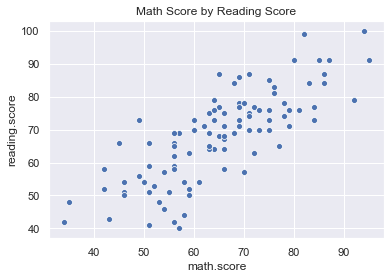

In [181]:
sns.scatterplot(x = "math.score", y = "reading.score", data = examScore)
plt.title("Math Score by Reading Score")
plt.xlabel('math.score')
plt.ylabel('reading.score');

We see that as the reading scores go higher, so do the math scores. This makes sense - a student who's poorer at reading may not be able to understand the exam questions, translating to a lower math score. We don't have enough information to verify this theory just yet, but examining the relationship using a scatter plot has given us some insight into how the two are related!

When describing the distribution of a single quantitative variable with a histogram, we describe the overall pattern of the distribution (shape, center, spread) and any deviations from that pattern (outliers). The scatter plot here does the same thing, albeit with 2 variables. Two important pieces of information that the scatter plot gives us is the nature (linear/non-linear) of relationship and its direction (positive/negative).

![](../images/linear_nonlinear.png)

A relationship between two variables is classified as **linear** if the pattern of distribution for our data is centered about a straight line, i.e. we can plot a straight line that cuts through the data such that the points are evenly distributed across the line. If the pattern is distributed along some other form of curve, we say it is **non-linear**. If the points appear to be randomly strewn across the plot, we say that no relationship between the variables exist.

![](../images/positive_negative.png)

On the other hand, the direction of a relationship between two quantitative variables can be **positive** or **negative**. A positive (or **increasing**) relationship means that an increase in one of the variables is associated with an increase in the other. A negative (or **decreasing**) relationship means that an increase in one of the variables is associated with a decrease in the other. One important thing to note here is that not all relationships can be classified as either positive or negative - you can encounter cases where the values swing back and forth in both directions.

### Linear Relationships and Pearson's Correlation Coefficient
Although a scatter plot gives us valuable information in terms of the nature and direction of a relationship between two quantitative variables, what it fails to do is quantify the **strength** of said relationship. To that extent, we would like to utilize some numerical measure to assess *how much* of an impact one variable has on another.

Recall the case of a **linear relationship** - a relationship between two quantitative variables such that the pattern of distribution for our data is centered about a **straight line**. The plot below shows that we can indeed see somewhat of a linear pattern in our selected data.

In [ ]:
sns.lmplot(x = "reading.score", y  = "math.score", data = examScore, 
           ci = 95).fig.suptitle("Math Score by Reading Score", 
                                    y=1.01)
plt.show()

The **strength** of a linear relationship can be assessed using a numerical measure called **Pearson's correlation coefficient**, or **Pearson's r** for short.

For any two quantitative variables $X$ and $Y$, Pearson's correlation coefficient (denoted by $\mathrm{cor}(X,Y)$ or $r_{xy}$) measures on average, how much an increase (decrease) in $X$ is related to an increase (decrease) in $Y$. The sign of the correlation value (+/-) designates the direction of the relationship, i.e. positive or negative.

Mathematically, Pearson's correlation coefficient is defined as:
$$\mathrm{cor}(X,Y) = r_{xy} = \frac{\sum_i (x_i - \bar x)(y_i - \bar y)}{s_x * s_y}$$


where $\bar x$ and $\bar y$ are the means of $X$ and $Y$, and $s_x$ and $s_y$ are the standard deviation of $X$ and $Y$ respectively.

The correlation coefficient takes values **only** between -1 and 1, with +/-1 denoting a perfect positive/negative linear relationship and 0 denoting the absence of any relationship. Any other values taken within the $[-1, 1]$ interval indicate the strength of the relationship in a given direction (+/-). The figure below gives a summary of how we classify these relationships:

![](../images/corr.jpg)

Unfortunately, there are no clear rules on what values of the correlation coefficient constitute "Strong", "Moderate", or "Weak" correlations as various authors have been known prescribe arbitrary limits for their respective fields. For the purpose of this course, we'll use the following definition:

| Strength of Relationship | Correlation        |
|:------------------------:|:-------------------|
| Very Weak                | 0.01 - 0.20        |
| Weak                     | 0.21 - 0.40        |
| Moderate                 | 0.41 - 0.60        |
| Strong                   | 0.61 - 0.80        |
| Very Strong              | 0.81 - 0.99        |

Now let's have a look at quantifying the correlation for the relationship we examined earlier between the math and reading scores. In `numpy`, this can be done using the `corrcoef` function, which calculates the correlation between any two specified variables.

In [182]:
np.corrcoef(examScore.loc[:, "math.score"], examScore.loc[:, "reading.score"])

array([[1.        , 0.78919751],
       [0.78919751, 1.        ]])

or alternatively, using the `corr()` method of `pandas` DataFrame objects:

In [183]:
examScore.corr()

,math.score,reading.score,writing.score
math.score,1.000000,0.789198,0.770559
reading.score,0.789198,1.000000,0.939860
writing.score,0.770559,0.939860,1.000000


These functions generate a correlation matrix, i.e. a table of all possible pairs of variables and their related correlations. The diagonal of this matrix is always 1 as the correlation between any variable and itself must be perfect. Additionally, correlation is also symmetric, i.e. corr(𝑋,𝑌)=corr(𝑌,𝑋). This can be seen in the table as values above the diagonal are "reflected" to the bottom half.

Now let's have a look at the scatter plot for the reading and writing scores to verify if the strong positive relationship between these 2 variables that we see in the table is true.

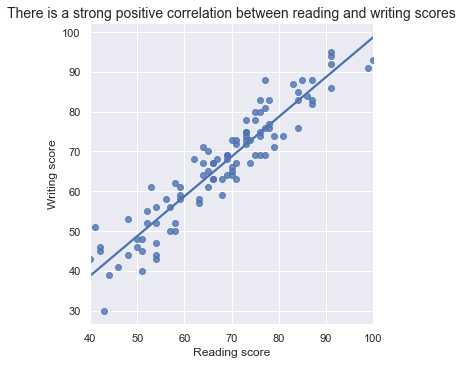

In [187]:
sns.lmplot(x = "reading.score", y = "writing.score", data = examScore, 
           ci = False)

ax = plt.gca() # get current axis 
ax.set_title("There is a strong positive correlation between reading and writing scores", fontsize=14)
ax.set_xlabel("Reading score")
ax.set_ylabel("Writing score")
plt.show()

Yup, it does!

<div class = "alert alert-block alert-danger">
<b>Exercise</b>
<p>
Explore all two-way relationships between variables in the <code>iris</code> dataset.
</div>

In [188]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [189]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Species ---> Petal.Length ,  Petal.Width , etc. (Categorical ---> Quantitative)

# Numerical Summaries
# Side by Side Box Plot

In [191]:
# MC
iris.groupby("Species").describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

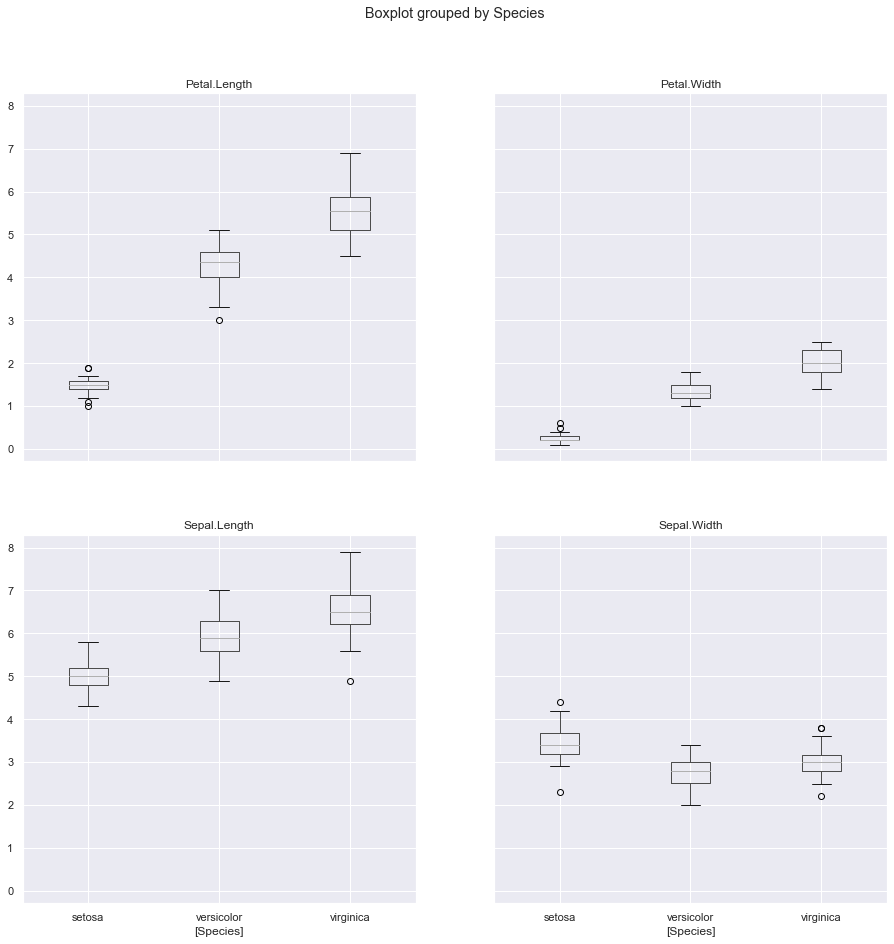

In [192]:
# MC
iris.boxplot(by='Species',figsize=(15, 15));

In [ ]:
# Petal.Length ---> Petal.Width ,  Setal.Length , etc. (Categorical ---> Quantitative)

# Pearson Correlation Coefficient
# Scatter Plot

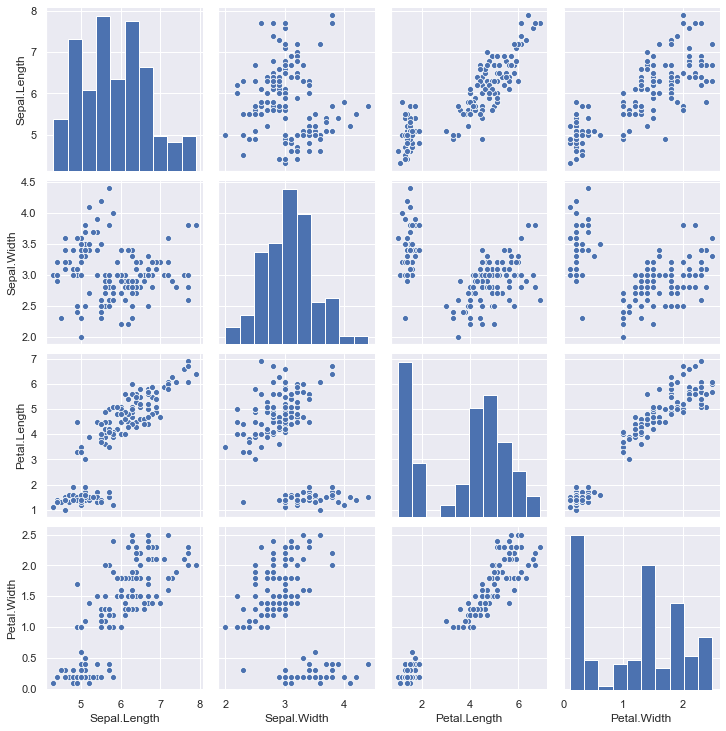

In [193]:
# MC
sns.pairplot(iris);

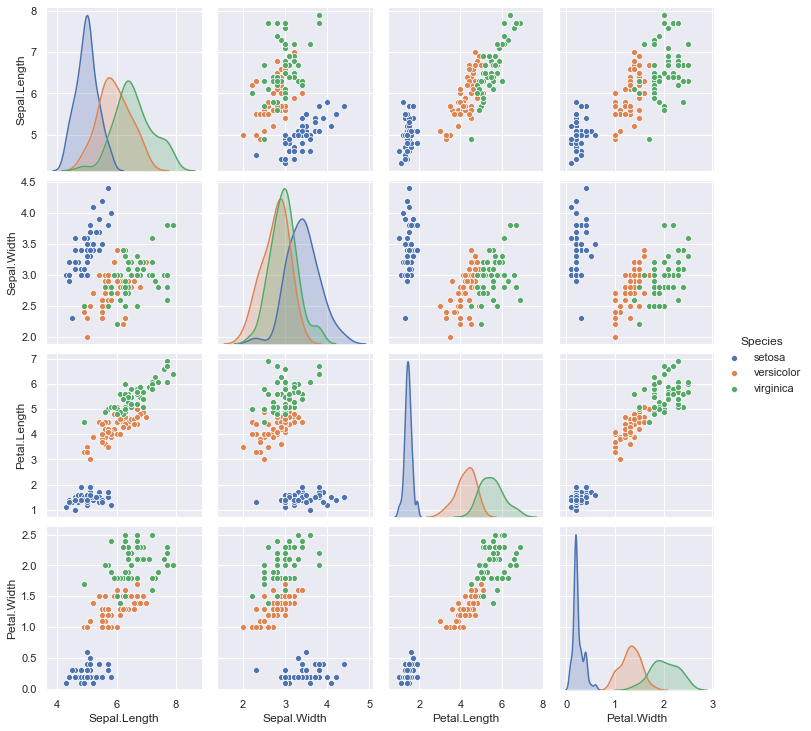

In [194]:
# MC
sns.pairplot(iris,hue="Species");

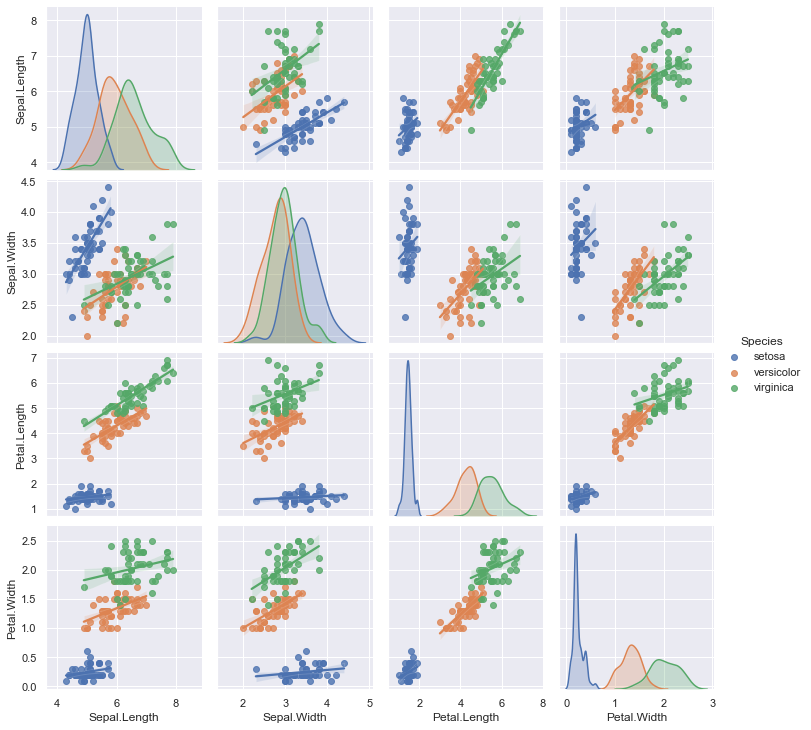

In [195]:
# MC
sns.pairplot(iris, kind = "reg", hue='Species');

In [196]:
# MC
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


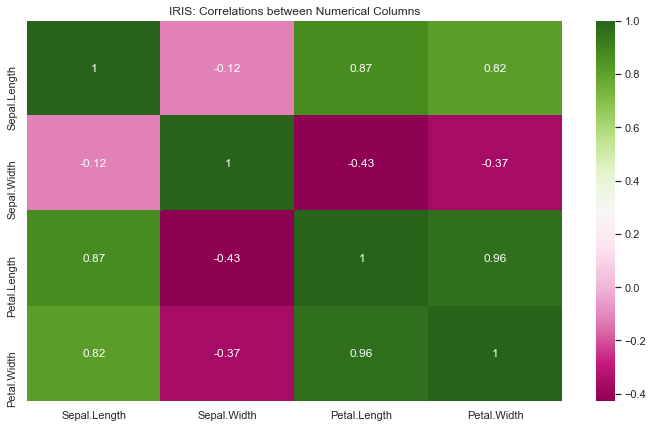

In [197]:
# MC
# Heat Map of Correlations
corr_matrix = iris.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False)
plt.title('IRIS: Correlations between Numerical Columns');